<a href="https://colab.research.google.com/github/JeongSoong/Machine_learning/blob/main/%EB%AC%B8%EC%A0%95%EC%88%98_201911047_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

심층 신경망으로 이미지 분류류

1.   이미지 데이터셋 로드
2.   이미지 데이터 정규화: 수렴속도 증가
3.   DenseLayer에 입력하기 위한 차원축소:reshape().shape
4.   모델 생성(DenseLayer(노드수,활성화 함수))
5.   compile(): 컴파일(옵티마이저,손실함수,평가지표)
6.   fit(): 훈련
7.   evaluate(): 검증
8.   predict(): 예측



In [148]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [149]:
##1. 케라스 내장 데이터셋 업로드
mnist = tf.keras.datasets.mnist

In [150]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

가중치 초기화

In [151]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation = 'relu')

In [152]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal', activation = 'relu')

In [153]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation = 'relu')

In [154]:
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, x_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000, 28, 28)


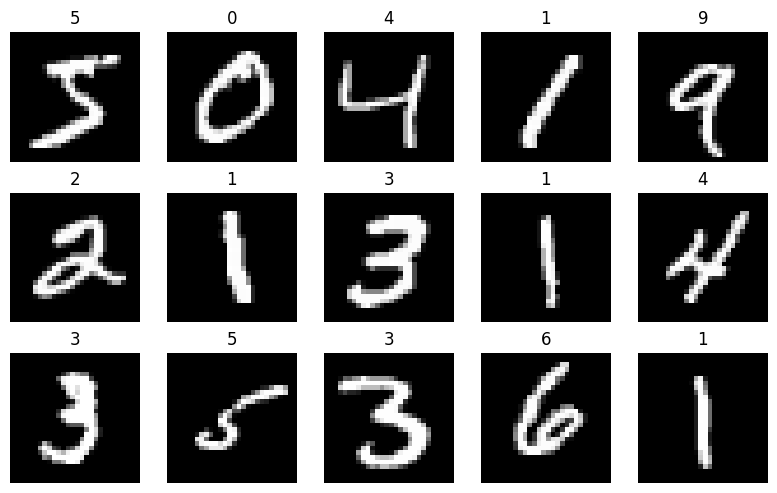

In [155]:
##훈련용 데이터 시각화
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap = 'gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [156]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

2.데이터 정규화

In [157]:
##정규화: 0~1사이 값으로 변환, 최대값으로 나눈다.
x_train_n = x_train/x_train.max()

In [158]:
x_train_n[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3. 차원축소

In [159]:
##차원 축소
x_train.reshape(60000,-1).shape

(60000, 784)

In [160]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

활성화 함수; 출력 함수

In [161]:
tf.keras.layers.Dense(128, activation='relu')

입력과 출력

In [162]:
##출력층이 1인 경우: sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

In [163]:
##출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='sigmoid')

모델생성

In [164]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 dense_74 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [165]:
adam = tf.keras.optimizers.Adam(lr=0.001)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

손실함수

In [166]:
##출력 노드가 1개, sigmoid활성화 함수를 적용한 경우
model.compile(loss='binary_crossentropy')

In [167]:
##출력 노드가 2개이상 softmax활성화 함수를 적용한 경우
##y가 원 핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

옵티마이저: 손실으 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 최적화 방법법

In [168]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련시 훈련 데이터: x_train, y_train 검증 데이터: validation_data=(x_test,y_test)

In [169]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3077 - accuracy: 0.7792 - val_loss: 0.4502 - val_accuracy: 0.8883
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3909 - accuracy: 0.9000 - val_loss: 0.3252 - val_accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2671 - accuracy: 0.9279 - val_loss: 0.2456 - val_accuracy: 0.9349
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2170 - accuracy: 0.9420 - val_loss: 0.1949 - val_accuracy: 0.9460
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1753 - accuracy: 0.9526 - val_loss: 0.1876 - val_accuracy: 0.9531
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1537 - accuracy: 0.9575 - val_loss: 0.1833 - val_accuracy: 0.9546
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1344 - accuracy: 0.9636 - val_loss: 0.1713 - val_accuracy

In [170]:
###keral_initializer = 'he_normal'을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'he_normal',activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_he.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                50240     
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [171]:
model_w_he.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5232 - accuracy: 0.7934 - val_loss: 0.4514 - val_accuracy: 0.8859
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3565 - accuracy: 0.9042 - val_loss: 0.2949 - val_accuracy: 0.9239
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2428 - accuracy: 0.9338 - val_loss: 0.2167 - val_accuracy: 0.9425
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1919 - accuracy: 0.9454 - val_loss: 0.1924 - val_accuracy: 0.9479
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1614 - accuracy: 0.9541 - val_loss: 0.1619 - val_accuracy: 0.9550
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1394 - accuracy: 0.9604 - val_loss: 0.2084 - val_accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1275 - accuracy: 0.9633 - val_loss: 0.1641 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

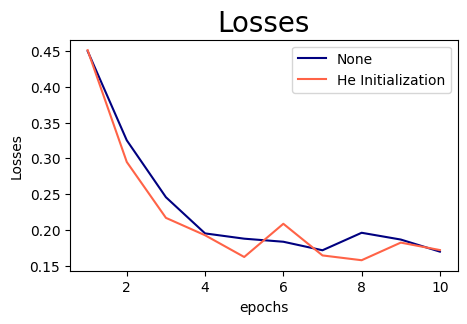

In [172]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [173]:
###keral_initializer = 'glorot_normal'을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal',activation = 'sigmoid'),
                             tf.keras.layers.Dense(32, activation = 'sigmoid'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_gl.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                50240     
                                                                 
 dense_79 (Dense)            (None, 32)                2080      
                                                                 
 dense_80 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [174]:
model_w_gl.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7570 - accuracy: 0.8136 - val_loss: 0.4431 - val_accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4006 - accuracy: 0.8814 - val_loss: 0.3683 - val_accuracy: 0.8853
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3623 - accuracy: 0.8904 - val_loss: 0.3490 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3449 - accuracy: 0.8942 - val_loss: 0.3167 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3240 - accuracy: 0.9010 - val_loss: 0.3029 - val_accuracy: 0.9075
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3093 - accuracy: 0.9047 - val_loss: 0.3029 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2943 - accuracy: 0.9101 - val_loss: 0.2713 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

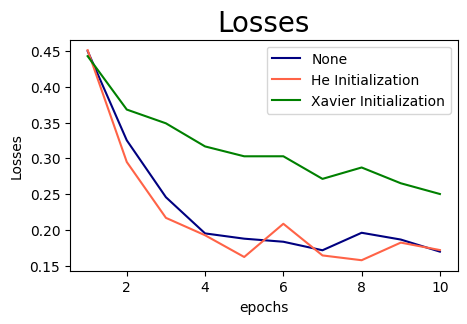

In [175]:
##세개개 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11), history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

규제(Regularization)

1.   L1: 가중치의 절대값에 0.001을 곱하여 비용 추가, 0.001
2.   L2: 가중치의 제곱에 0.001을 곱하여 비용 추가, 0.001



In [184]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer2 = regularizer2, activation = 'relu')
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer2 = regularizer2, activation = 'relu')
    tf.keras.layers.Dense(10, activation = 'softmax')
])

SyntaxError: ignored

In [ ]:
L2_model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
L2_model = L2_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

In [176]:
##검증
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9649


[0.16940978169441223, 0.964900016784668]

In [177]:
##검증결과 저장
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증셋 정확도: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9649
검증셋 정확도:  0.964900016784668


In [178]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.55859131e-16, 3.03547604e-05, 6.17495317e-08, 2.34775769e-07,
       1.10693755e-07, 1.43141774e-08, 5.04558543e-18, 9.99660730e-01,
       1.88688212e-08, 3.08493851e-04], dtype=float32)

In [179]:
predictions[0].max()

0.99966073

In [180]:
np.argmax(predictions[0])

7

In [181]:
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx],np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img,y_true,y_pred,confidence

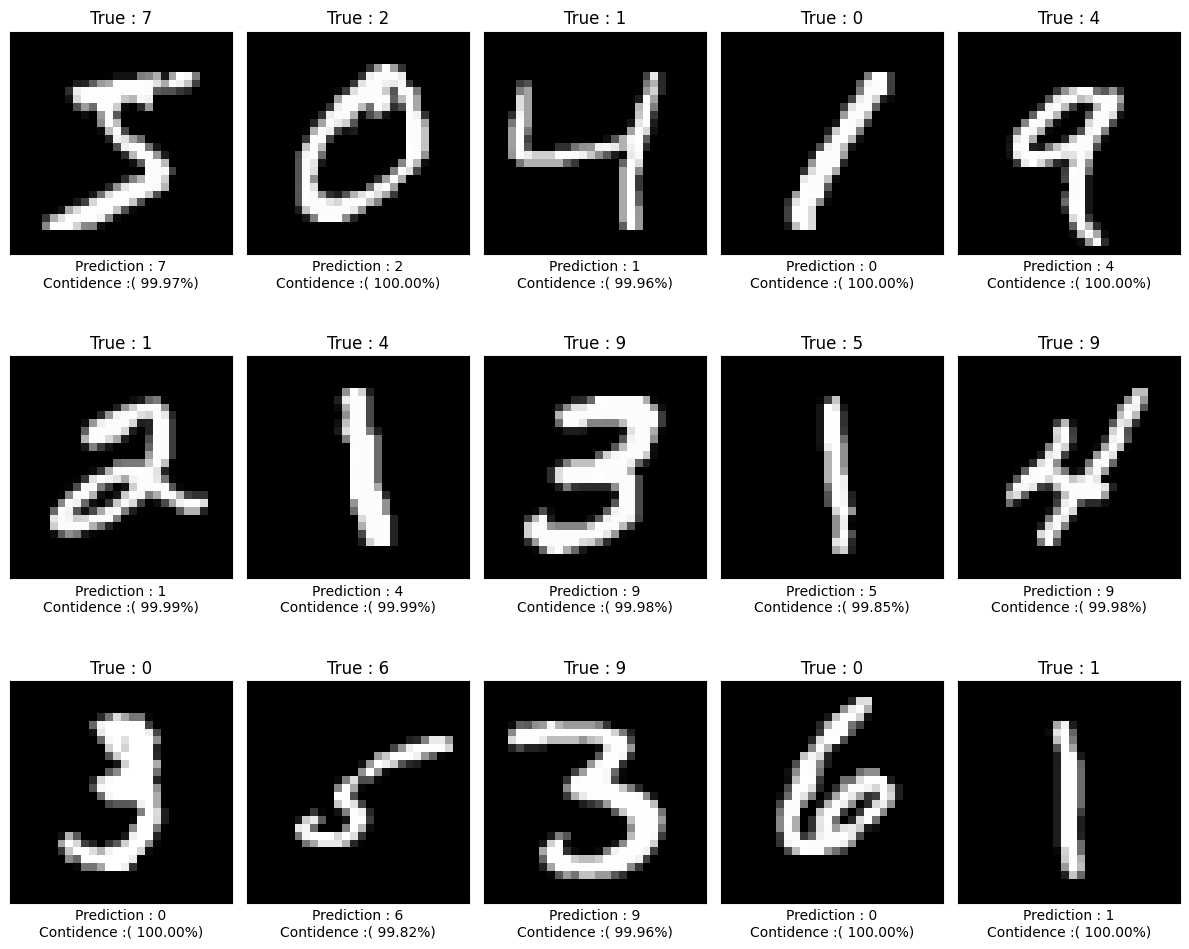

In [182]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(x_train[i], cmap = 'gray')
    #x,y축 눈금
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}', fontsize=12)
    ax.set_xlabel(f'Prediction : {y_pred}\nContidence :( {confidence:.2f}%)',fontsize = 10)
plt.tight_layout()
plt.show()